# Assignment 2: Privacy-Preserving Data Sharing
### Security and Privacy Project - MECD (2022/2023)

### Autores

- Duarte Meneses - 2019216949
- Patricia Costa - 2019213995

### Import dataset

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

infri = pd.read_csv('data/infringement_dataset_v2.csv')

infri.fillna(value = -1, inplace = True) 

display(infri)

,loan_id,infringed,contract_type,gender,has_own_car,has_own_realty,num_children,annual_income,credit_amount,credit_annuity,...,first_name,last_name,past_avg_amount_annuity,past_avg_amt_application,past_avg_amt_credit,past_loans_approved,past_loans_refused,past_loans_canceled,past_loans_unused,past_loans_total
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Robert,Watkins,9251.77500,179055.000,179055.00,1.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Jane,Navarro,56553.99000,435436.500,484191.00,3.0,0.0,0.0,0.0,3.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,David,Seagraves,5357.25000,24282.000,20106.00,1.0,0.0,0.0,0.0,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Deborah,Tandy,23651.17500,272203.260,291695.50,5.0,3.0,1.0,0.0,9.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,David,Walker,12278.80500,150530.250,166638.75,6.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,Lawrence,Mcwayne,6605.91000,40455.000,40455.00,1.0,0.0,0.0,0.0,1.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,Belinda,Loveland,10074.46500,57595.500,56821.50,1.0,0.0,0.0,0.0,1.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,Aileen,Rasmussen,4770.40500,24162.750,20625.75,2.0,0.0,0.0,0.0,2.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,Mary,Marbury,10681.13250,121317.750,134439.75,2.0,0.0,0.0,0.0,2.0


### 2.2. Sensitivity

##### Past events

In [29]:
from matplotlib import pyplot as plt
columns = ['age', 'past_avg_amount_annuity', 'past_avg_amt_application', 'past_avg_amt_credit', 'past_loans_total']
colunas = infri[columns]

display(infri)

,loan_id,infringed,contract_type,gender,has_own_car,has_own_realty,num_children,annual_income,credit_amount,credit_annuity,...,first_name,last_name,past_avg_amount_annuity,past_avg_amt_application,past_avg_amt_credit,past_loans_approved,past_loans_refused,past_loans_canceled,past_loans_unused,past_loans_total
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Robert,Watkins,9251.77500,179055.000,179055.00,1.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Jane,Navarro,56553.99000,435436.500,484191.00,3.0,0.0,0.0,0.0,3.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,David,Seagraves,5357.25000,24282.000,20106.00,1.0,0.0,0.0,0.0,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Deborah,Tandy,23651.17500,272203.260,291695.50,5.0,3.0,1.0,0.0,9.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,David,Walker,12278.80500,150530.250,166638.75,6.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,Lawrence,Mcwayne,6605.91000,40455.000,40455.00,1.0,0.0,0.0,0.0,1.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,Belinda,Loveland,10074.46500,57595.500,56821.50,1.0,0.0,0.0,0.0,1.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,Aileen,Rasmussen,4770.40500,24162.750,20625.75,2.0,0.0,0.0,0.0,2.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,Mary,Marbury,10681.13250,121317.750,134439.75,2.0,0.0,0.0,0.0,2.0


In [34]:
def sensitivity_mean(data):
    l = []
    data = data.to_numpy()

    mean_past = np.average(data)
    print("Total mean:", mean_past)

    for i in range(len(data)):
        aux = np.average(np.delete(data, i))
        l.append(abs(mean_past - aux))
    
    return max(l)

In [35]:
df_sensitivity = pd.DataFrame(columns=columns[1:], index = ["Original Sensitivity"])

s_annuity = sensitivity_mean(colunas['past_avg_amount_annuity'])
s_application = sensitivity_mean(colunas['past_avg_amt_application'])
s_credit = sensitivity_mean(colunas['past_avg_amt_credit'])
s_loans = sensitivity_mean(colunas['past_loans_total'])

df_sensitivity.loc["Original Sensitivity"] = [s_annuity, s_application, s_credit, s_loans]

display(df_sensitivity)

Total mean: 13734.724771635307
Total mean: 145765.05688515
Total mean: 160970.02387265398
Total mean: 4.543730142986755


,past_avg_amount_annuity,past_avg_amt_application,past_avg_amt_credit,past_loans_total
Original Sensitivity,0.932297,12.696286,12.646841,0.000223


### 2.3. Differential Privacy

In [50]:
def add_laplace_noise(data, column, sensitivity, epsilon):
  data = data.to_numpy()

  for i in range(len(data)):
    laplace = np.random.laplace(loc=0, scale=sensitivity/epsilon)
    data[i] = data[i] + laplace

  df = pd.DataFrame(data, columns = [column])
  return df

def percentage_error(orig, est):
  return ((orig-est) / orig) * 100

##### Adding noise

In [53]:
noise_annuity_001 = add_laplace_noise(colunas['past_avg_amount_annuity'], 'past_avg_amount_annuity', s_annuity, 0.01)
s_annuity_001 = sensitivity_mean(noise_annuity_001)

noise_application_001 = add_laplace_noise(colunas['past_avg_amt_application'], 'past_avg_amt_application', s_application, 0.01)
s_application_001 = sensitivity_mean(noise_application_001)

noise_credit_001 = add_laplace_noise(colunas['past_avg_amt_credit'], 'past_avg_amt_credit', s_credit, 0.01)
s_credit_001 = sensitivity_mean(noise_credit_001)

noise_loans_001 = add_laplace_noise(colunas['past_loans_total'], 'past_loans_total', s_loans, 0.01)
s_loans_001 = sensitivity_mean(noise_loans_001)

df_sensitivity.loc["Epsilon = 0.01"] = [s_annuity_001, s_application_001, s_credit_001, s_loans_001]
display(df_sensitivity)



Total mean: 13893.125764098531
Total mean: 145768.86312641462
Total mean: 160973.38811213395
Total mean: 4.543704596252364


,past_avg_amount_annuity,past_avg_amt_application,past_avg_amt_credit,past_loans_total
Original Sensitivity,0.932297,12.696286,12.646841,0.000223
Epsilon = 0.01,0.93251,12.688878,12.643583,0.000223


In [54]:
noise_annuity_02 = add_laplace_noise(colunas['past_avg_amount_annuity'], 'past_avg_amount_annuity', s_annuity, 0.2)
s_annuity_02 = sensitivity_mean(noise_annuity_02)

noise_application_02 = add_laplace_noise(colunas['past_avg_amt_application'], 'past_avg_amt_application', s_application, 0.2)
s_application_02 = sensitivity_mean(noise_application_02)

noise_credit_02 = add_laplace_noise(colunas['past_avg_amt_credit'], 'past_avg_amt_credit', s_credit, 0.2)
s_credit_02 = sensitivity_mean(noise_credit_02)

noise_loans_02 = add_laplace_noise(colunas['past_loans_total'], 'past_loans_total', s_loans, 0.2)
s_loans_02 = sensitivity_mean(noise_loans_02)

df_sensitivity.loc["Epsilon = 0.2"] = [s_annuity_02, s_application_02, s_credit_02, s_loans_02]
display(df_sensitivity)

Total mean: 13893.116942071347
Total mean: 145768.91254018707
Total mean: 160973.39506545957
Total mean: 4.5437066936105035


,past_avg_amount_annuity,past_avg_amt_application,past_avg_amt_credit,past_loans_total
Original Sensitivity,0.932297,12.696286,12.646841,0.000223
Epsilon = 0.01,0.93251,12.688878,12.643583,0.000223
Epsilon = 0.2,0.932508,12.688826,12.643447,0.000223


In [55]:
noise_annuity_l2 = add_laplace_noise(colunas['past_avg_amount_annuity'], 'past_avg_amount_annuity', s_annuity, np.log(2))
s_annuity_l2 = sensitivity_mean(noise_annuity_l2)

noise_application_l2 = add_laplace_noise(colunas['past_avg_amt_application'], 'past_avg_amt_application', s_application, np.log(2))
s_application_l2 = sensitivity_mean(noise_application_l2)

noise_credit_l2 = add_laplace_noise(colunas['past_avg_amt_credit'], 'past_avg_amt_credit', s_credit, np.log(2))
s_credit_l2 = sensitivity_mean(noise_credit_l2)

noise_loans_l2 = add_laplace_noise(colunas['past_loans_total'], 'past_loans_total', s_loans, np.log(2))
s_loans_l2 = sensitivity_mean(noise_loans_l2)

df_sensitivity.loc["Epsilon = ln(2)"] = [s_annuity_l2, s_application_l2, s_credit_l2, s_loans_l2]
display(df_sensitivity)

Total mean: 13893.115354395879
Total mean: 145768.92651521403
Total mean: 160973.37741268444
Total mean: 4.543706820579108


,past_avg_amount_annuity,past_avg_amt_application,past_avg_amt_credit,past_loans_total
Original Sensitivity,0.932297,12.696286,12.646841,0.000223
Epsilon = 0.01,0.93251,12.688878,12.643583,0.000223
Epsilon = 0.2,0.932508,12.688826,12.643447,0.000223
Epsilon = ln(2),0.93251,12.688805,12.643398,0.000223


In [56]:
noise_annuity_l3 = add_laplace_noise(colunas['past_avg_amount_annuity'], 'past_avg_amount_annuity', s_annuity, np.log(3))
s_annuity_l3 = sensitivity_mean(noise_annuity_l3)

noise_application_l3 = add_laplace_noise(colunas['past_avg_amt_application'], 'past_avg_amt_application', s_application, np.log(3))
s_application_l3 = sensitivity_mean(noise_application_l3)

noise_credit_l3 = add_laplace_noise(colunas['past_avg_amt_credit'], 'past_avg_amt_credit', s_credit, np.log(3))
s_credit_l3 = sensitivity_mean(noise_credit_l3)

noise_loans_l3 = add_laplace_noise(colunas['past_loans_total'], 'past_loans_total', s_loans, np.log(3))
s_loans_l3 = sensitivity_mean(noise_loans_l3)

df_sensitivity.loc["Epsilon = ln(3)"] = [s_annuity_l3, s_application_l3, s_credit_l3, s_loans_l3]
display(df_sensitivity)

Total mean: 13893.114214010124
Total mean: 145768.9527933773
Total mean: 160973.35475246917
Total mean: 4.5437063648287594


,past_avg_amount_annuity,past_avg_amt_application,past_avg_amt_credit,past_loans_total
Original Sensitivity,0.932297,12.696286,12.646841,0.000223
Epsilon = 0.01,0.93251,12.688878,12.643583,0.000223
Epsilon = 0.2,0.932508,12.688826,12.643447,0.000223
Epsilon = ln(2),0.93251,12.688805,12.643398,0.000223
Epsilon = ln(3),0.932511,12.688729,12.643381,0.000223


Comparison of sensitivity in different epsilons


<Figure size 640x480 with 0 Axes>

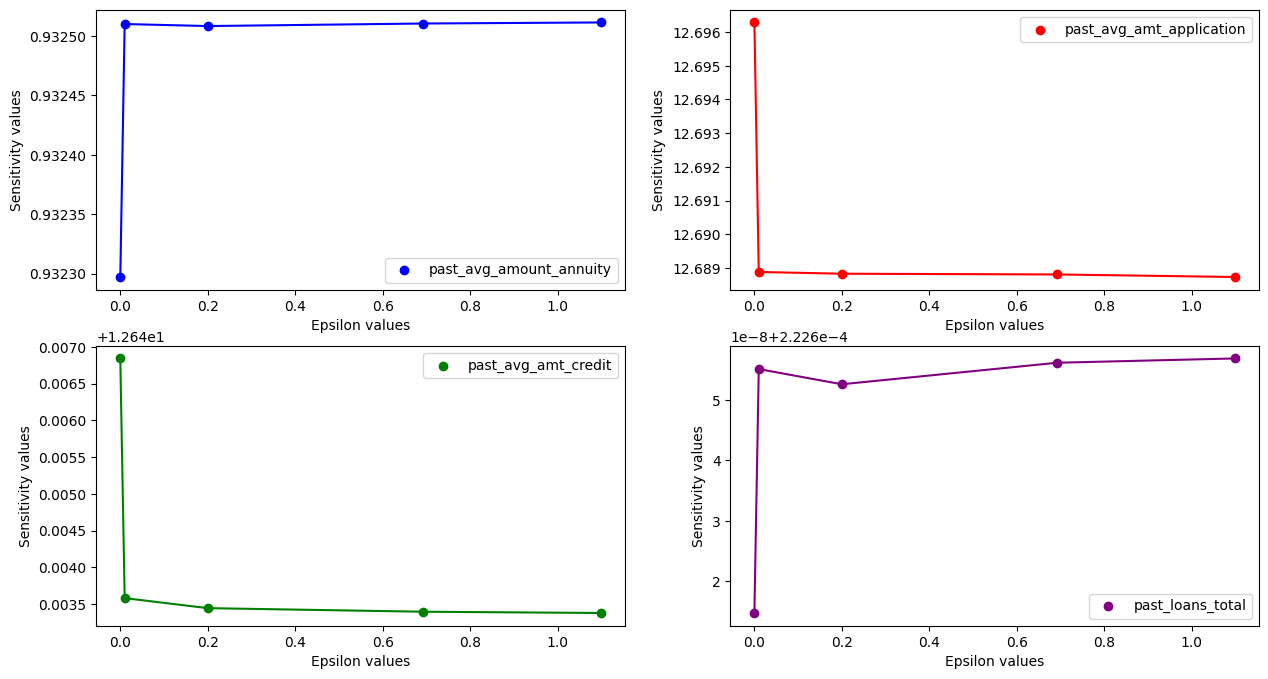

In [109]:
s_annuity_a = [s_annuity, s_annuity_001, s_annuity_02, s_annuity_l2, s_annuity_l3]
s_application_a = [s_application, s_application_001, s_application_02, s_application_l2, s_application_l3]
s_credit_a = [s_credit, s_credit_001, s_credit_02, s_credit_l2, s_credit_l3]
s_loans_a = [s_loans, s_loans_001, s_loans_02, s_loans_l2, s_loans_l3]

epsilon_values = [0, 0.01, 0.2, np.log(2), np.log(3)]

plt.figure()
plt.subplots(2, 2, figsize=(15, 8))

print("Comparison of sensitivity in different epsilons")

def plot(num, column, x, y, color):    
    plt.subplot(2, 2, num)
    plt.xlabel("Epsilon values")
    plt.ylabel("Sensitivity values")
    plt.plot(x, y, color = color)
    plt.scatter(x, y, color = color, label= column)
    plt.legend()


plot(1, 'past_avg_amount_annuity', epsilon_values, s_annuity_a, 'blue')
plot(2,'past_avg_amt_application', epsilon_values, s_application_a, 'red')
plot(3, 'past_avg_amt_credit', epsilon_values, s_credit_a, 'green')
plot(4, 'past_loans_total', epsilon_values, s_loans_a, 'purple')


### Past_events group by age

In [122]:
columns = ['age', 'past_avg_amount_annuity', 'past_avg_amt_application', 'past_avg_amt_credit', 'past_loans_total']

noise_df_001 = pd.DataFrame(columns=columns)
noise_df_001["age"] = infri["age"]
noise_df_001['past_avg_amount_annuity'] = noise_annuity_001['past_avg_amount_annuity']
noise_df_001['past_avg_amt_application'] = noise_application_001['past_avg_amt_application']
noise_df_001['past_avg_amt_credit'] = noise_credit_001['past_avg_amt_credit']
noise_df_001['past_loans_total'] = noise_loans_001['past_loans_total']

noise_df_02 = pd.DataFrame(columns=columns)
noise_df_02["age"] = infri["age"]
noise_df_02['past_avg_amount_annuity'] = noise_annuity_02['past_avg_amount_annuity']
noise_df_02['past_avg_amt_application'] = noise_application_02['past_avg_amt_application']
noise_df_02['past_avg_amt_credit'] = noise_credit_02['past_avg_amt_credit']
noise_df_02['past_loans_total'] = noise_loans_02['past_loans_total']

noise_df_l2 = pd.DataFrame(columns=columns)
noise_df_l2["age"] = infri["age"]
noise_df_l2['past_avg_amount_annuity'] = noise_annuity_l2['past_avg_amount_annuity']
noise_df_l2['past_avg_amt_application'] = noise_application_l2['past_avg_amt_application']
noise_df_l2['past_avg_amt_credit'] = noise_credit_l2['past_avg_amt_credit']
noise_df_l2['past_loans_total'] = noise_loans_l2['past_loans_total']

noise_df_l3 = pd.DataFrame(columns=columns)
noise_df_l3["age"] = infri["age"]
noise_df_l3['past_avg_amount_annuity'] = noise_annuity_l3['past_avg_amount_annuity']
noise_df_l3['past_avg_amt_application'] = noise_application_l3['past_avg_amt_application']
noise_df_l3['past_avg_amt_credit'] = noise_credit_l3['past_avg_amt_credit']
noise_df_l3['past_loans_total'] = noise_loans_l3['past_loans_total']


In [124]:
groupby_age_original = colunas.groupby("age").mean()
groupby_age_001 = noise_df_001.groupby("age").mean()
groupby_age_02 = noise_df_02.groupby("age").mean()
groupby_age_l2 = noise_df_l2.groupby("age").mean()
groupby_age_l3 = noise_df_l3.groupby("age").mean()

##### Mean of people age of infringements

In [125]:
df = infri[['infringed', 'age']]
display(df)

,infringed,age
0,1,25
1,0,45
2,0,52
3,0,52
4,0,54
...,...,...
307506,0,25
307507,0,56
307508,0,41
307509,1,32


In [131]:
analyse = df[df['infringed'] == 1] 
s_age = sensitivity_mean(analyse["age"])

res_age = pd.DataFrame(columns=["Age"], index = ["Original Sensitivity"])
res_age.loc["Original Sensitivity"] = s_age
display(res_age)


Total mean: 40.279959718026184


,Age
Original Sensitivity,0.001117


##### Mean of people age of infringements

In [134]:
dp_age_001 = add_laplace_noise(analyse["age"], "age", s_age, 0.01)
s_age_001 = sensitivity_mean(dp_age_001["age"])
res_age.loc["Epsilon = 0.01"] = s_age_001

dp_age_02 = add_laplace_noise(analyse["age"], "age", s_age, 0.2)
s_age_02 = sensitivity_mean(dp_age_02["age"])
res_age.loc["Epsilon = 0.2"] = s_age_02

dp_age_l2 = add_laplace_noise(analyse["age"], "age", s_age, np.log(2))
s_age_l2 = sensitivity_mean(dp_age_l2["age"])
res_age.loc["Epsilon = ln(2)"] = s_age_l2

dp_age_l3 = add_laplace_noise(analyse["age"], "age", s_age, np.log(3))
s_age_l3 = sensitivity_mean(dp_age_l3["age"])
res_age.loc["Epsilon = ln(3)"] = s_age_l3

display(res_age)

Total mean: 36.782275931520644
Total mean: 36.281369587109765
Total mean: 35.77993957703927
Total mean: 35.27742195367573


,Age
Original Sensitivity,0.001117
Epsilon = 0.01,0.001217
Epsilon = 0.2,0.001237
Epsilon = ln(2),0.001258
Epsilon = ln(3),0.001238


### 3. Synthetic Data